In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

# Hi-Fish Screen data anslysis

In [1]:
#%matplotlib notebook
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time as time
sns.set(style = 'ticks')

In [2]:
!pwd
!ls

/Users/kellenxu/DataScienceinPython/Screen Data
Cluster_visualization_by_PCA + k-mean.pdf
Plate 1 map.csv
Plate 2 map.csv
Screen.ipynb
Summary_well_data_5P1C5.csv
Summary_well_data_5P1C6.csv
Summary_well_data_5P2C5.csv
Summary_well_data_5P2C6.csv
tangle_dendrogram.pdf
unnamed-chunk-16-1.png
zip
zip.zip


## Import Data

In [2]:
st = time.time()

map1 = pd.read_csv('Plate 1 map.csv')
map2 = pd.read_csv('Plate 2 map.csv')
P1C5 = pd.read_csv('Summary_well_data_5P1C5.csv')
P1C6 = pd.read_csv('Summary_well_data_5P1C6.csv').iloc[:,1:]
P2C5 = pd.read_csv('Summary_well_data_5P2C5.csv').iloc[:,:-1]
P2C6 = pd.read_csv('Summary_well_data_5P2C6.csv').iloc[:,:-1]

p1c5 = pd.merge(map1[map1['Type'] == 'Amp'].iloc[:,[2,8]], P1C5, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p1c6 = pd.merge(map1[map1['Type'] == 'Amp'].iloc[:,[2,8]], P1C6, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p2c5 = pd.merge(map2[map2['Type'] == 'Amp'].iloc[:,[2,8]], P2C5, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
p2c6 = pd.merge(map2[map2['Type'] == 'Amp'].iloc[:,[2,8]], P2C6, 
                how = 'left', left_on = '384 Position.1', right_on = 'Well').set_index('Gene').iloc[:,2:]
C5 = p1c5.append(p2c5)
C6 = p1c6.append(p2c6)
C = (C5 + C6)/ 2.

#drop columns which end by '_cnt','_norm' or start with 'Max_','Min_'
to_drop = []
for col in C.columns:
    if col[-3:]=='cnt' or col[-4:]=='norm':
        to_drop.append(col)
    elif col[:3]=='Max' or col[:3]=='Min':
        to_drop.append(col)
to_use = list(set(C.columns) - set(to_drop))
Cc = C[to_use]
print('{} features to use:\n\n{}\n\n{} features dropped:\n\n{}'.format(len(to_use), to_use, len(to_drop),to_drop))

#replace gene names
Genes = C.index.tolist()
His2B = 'His2B:CG33870 | His2B:CG33868 | His2B:CG33882 | His2B:CG33894 | His2B:CG33876 | His2B:CG33892 | His2B:CG33910 | His2B:CG33898 | His2B:CG33872 | His2B:CG33908 | His2B:CG33888 | His2B:CG33902 | His2B:CG33890 | His2B:CG33886 | His2B:CG33874 | His2B:CG33884 | His2B:CG33878 | His2B:CG17949 | His2B:CG33906 | His2B:CG33904 | His2B:CG33900 | His2B:CG33880 | His2B:CG33896 '
His3 = 'His3:CG33818 | His3:CG33815 | His3:CG33857 | His3:CG33833 | His3:CG33839 | His3:CG33806 | His3:CG33866 | His3:CG33863 | His-Psi:CR31754 | His3:CG33842 | His3:CG33827 | His3:CG33812 | His3:CG33860 | His3:CG33824 | His3:CG31613 | His3:CG33809 | His3:CG33848 | His3:CG33845 | His3:CG33821 | His3:CG33851 | His3:CG33830 | His3:CG33836 | His3:CG33803 | His3:CG33854 '
Hsp = 'Hsp70Bb | Hsp70Ba | Hsp70Bc | Hsp70Bbb '
#print(Gene.index(His),Gene.index(Hsp))
Genes[Genes.index(His2B)] = 'His2B:CG+'
Genes[Genes.index(His3)] = 'His3:CG+'
Genes[Genes.index(Hsp)] = 'Hsp70B+'
#Replace multiplicated names
Repeats = set([x for x in Genes if Genes.count(x) >1])
print('\n{} genes have repeats:\n\n {}'.format(len(Repeats), Repeats))
for i in [1,2,3]:
    for r in list(Repeats):
        if r in Genes:
            Genes[Genes.index(r)] = r + '_' + str(i)

C.index = Genes
elapsed_time = time.time() - st
print('\ntime: {0:.5f}s\n'.format(elapsed_time))
print(len(Genes),Genes[375])

29 features to use:

['Avg_RG_std_dist', 'Avg_red_periphery_mean_dist', 'Avg_green_periphery_std_dist', 'Avg_Red_mean_dist', '1R1G_nuc_ratio', 'Red_2foci_ratio', 'Large_nuc_ratio', 'Nofoci_cell_ratio', 'Red_5+foci_ratio', 'Avg_Red_std_dist', 'Total_far_foci_ratio', 'Avg_Green_std_dist', 'Green_far_foci_ratio', 'Avg_red_periphery_std_dist', 'Avg_All_mean_dist', 'Green_2foci_ratio', 'Green_4foci_ratio', 'Red_far_foci_ratio', 'Red_3_foci_ratio', 'Avg_Green_mean_dist', 'Green_3_foci_ratio', 'Avg_RG_mean_dist', '1R1G_touch_nuc_ratio', 'Avg_All_std_dist', 'Red_4foci_ratio', 'Green_1foci_ratio', 'Avg_green_periphery_mean_dist', 'Red_1foci_ratio', 'Green_5+foci_ratio']

46 features dropped:

['Cell_cnt', 'Nofoci_cell_cnt', 'Green_cell_cnt', 'Red_cell_cnt', 'Mean_green_foci_cnt', 'Mean_red_foci_cnt', 'Max_Green_mean_dist', 'Max_Green_std_dist', 'Max_Red_mean_dist', 'Max_Red_std_dist', 'Max_All_mean_dist', 'Max_All_std_dist', 'Min_RG_mean_dist', 'Min_RG_std_dist', 'Max_RG_mean_dist', 'Max_RG_std

## Feature Scaling

In [3]:
# Before applying clustering, each feature should be centered (zero mean) and with unit variance
#http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html\scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#print(scaler.fit(C))
#print(scaler.mean_)
C_normalized = scaler.fit(Cc).transform(Cc)  # type numpy array
#np.argwhere(np.isnan(C_normalized))

## PCA

In [4]:
## PCA
#http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA

from sklearn.decomposition import PCA

pca = PCA(n_components = 0.95).fit(C_normalized) # preserve 95% variance
C_pca = pca.transform(C_normalized)
#pca.n_components_ 

PCcolumns = []
for i in range (1,pca.n_components_+1):
    PCcolumns.append('PC{}'.format(i))

C_PC= pd.DataFrame(C_pca, index=C.index, columns= PCcolumns)
C_PC.head(3)

#np.argwhere(np.isnan(C_pca))
st = time.time()
elapsed_time = time.time() - st
print('PCA time: {}s\nPCA reduces data size from {} to {} and preserves 95% of variance'
      .format(elapsed_time,C_normalized.shape,C_pca.shape))

PCA time: 2.002716064453125e-05s
PCA reduces data size from (424, 29) to (424, 10) and preserves 95% of variance


## myVisualizer( label, labelname)

In [6]:
#t-SNE plot
#C_tsne_plot= pd.DataFrame(c_tsne_plot, index=C.index, columns=('TC1','TC2'))
#http://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html

#plt.scatter(C_kmean2d['PC1'], C_kmean2d['PC2'], c= C_kmean2d['Label'], cmap='tab20', alpha=0.5)
#print(cm)
#cm.colors[19]
st = time.time()
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=150.0,n_iter=1500,random_state = 0)
c_tsne_plot = tsne.fit_transform(C_normalized)
C_tsne_plot= pd.DataFrame(c_tsne_plot, index=C.index, columns=('TC1','TC2'))
elapsed_time = time.time() - st
print('time: {0:.5f}s\n'.format(elapsed_time))

time: 16.14438s



In [16]:
#<matplotlib.colors.ListedColormap object at 0x1133ab6d8>
#https://matplotlib.org/api/_as_gen/matplotlib.colors.ListedColormap.html

# Have colormaps separated into categories:
# http://matplotlib.org/examples/color/colormaps_reference.html
st = time.time()

cm = plt.cm.get_cmap('tab20')
mk = ('*','o')
def myVisualizer(label,labelname='unknown label'):
    C_tsne_plot['Label'] = label
    clusters= np.unique(label)
    
    plt.figure(figsize=(6.5,5))
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['Label']== i]
        plt.scatter(df['TC1'], df['TC2'], s=30, c= cm.colors[i],marker= mk[i%2], alpha=0.6, label = str(i))    
    plt.xlabel('First t-SNE axis')
    plt.ylabel('Second t-SNE axis')
    plt.title('Cluster visualization ( by {} )'.format(labelname))
    plt.legend(title='Cluster #', loc=6, bbox_to_anchor= (1,0.5), fontsize='medium')
    plt.show()
    return
#myVisualizer(kmeans2.labels_, 'k-mean')


def myNameVisual(colorlabel,labelname='unknown label',txtlabel= Genes ):
    clusters= np.unique(colorlabel)
    C_tsne_plot['color'] = colorlabel
    C_tsne_plot['txt'] = txtlabel
    
    plt.figure(figsize=(25,25))
    recycle= []
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['color']== i]
        plt.scatter(df['TC1'], df['TC2'], s=50, c= cm.colors[i],marker= mk[i%2], alpha=0.6,label = str(i))
        for txt, x, y in zip(df['txt'].tolist(), df['TC1'].tolist(), df['TC2'].tolist()):
            plt.annotate(txt,xy=(x, y), xytext=(-10, 10),
            textcoords='offset points', ha='right', va='bottom',
            bbox=dict(boxstyle='round,pad=0.5', fc=cm.colors[i], alpha=0.3),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            recycle.append(i)
   
    plt.xlabel('First t-SNE axis')
    plt.ylabel('Second t-SNE axis')
    plt.title('Cluster visualization ( by {} )'.format(labelname))
    plt.legend(title='Cluster #', loc=0, borderaxespad= 5, fontsize='medium')
    #plt.savefig('Cluster_visualization_by_{}.pdf'.format(labelname))
    plt.close()#print(colorlabel)
    return print(len(recycle))

elapsed_time = time.time() - st
print('time: {0:.5f}s\n'.format(elapsed_time))
#myLabelVisual(brich.labels_, 'PCA + birch')

time: 0.00036s



## k-mean

In [5]:
#k-mean
#http://scikit-learn.org/stable/modules/generated /sklearn.cluster.KMeans.html
from sklearn.cluster import KMeans
n_labels= 15
kmeans = KMeans(n_clusters=n_labels, random_state=0).fit(C_pca)
akmeans = KMeans(n_clusters=n_labels, random_state=0).fit(C_normalized)
print(type(C_PC), C_PC.shape, type(kmeans.labels_), kmeans.labels_.shape)
C_kmean= C_PC
C_kmean['Label'] = kmeans.labels_

C_kmean.iloc[375]


<class 'pandas.core.frame.DataFrame'> (424, 10) <class 'numpy.ndarray'> (424,)


PC1     -1.621627
PC2     -0.315929
PC3     -0.409815
PC4      0.488819
PC5     -0.959282
PC6      0.308232
PC7     -0.656272
PC8     -0.559634
PC9     -0.090338
PC10     0.407808
Label    5.000000
Name: abba _3, dtype: float64

In [10]:
#pandas.DataFrame.plot
#ax = C_kmean.plot.scatter(x='PC1', y='PC2', marker= '1', colormap='hsv', c='Label',label='P',alpha = 0.4)

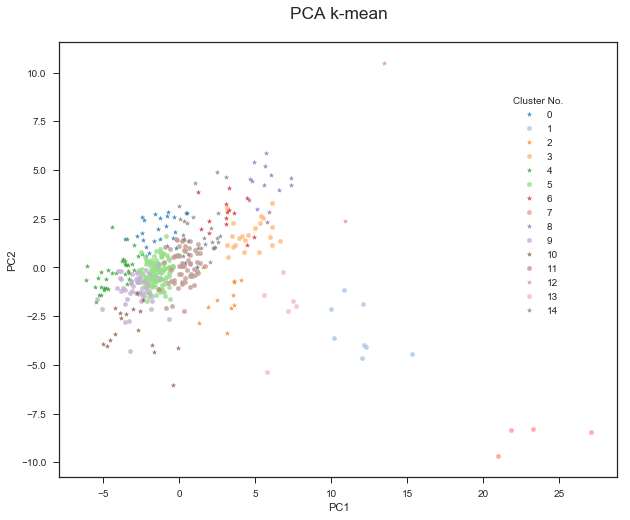

In [9]:
#Plotting PCA2D
%matplotlib inline
cm = plt.cm.get_cmap('tab20')
mk = ('*','o')
plt.figure(figsize=(10,8))
for i in range(n_labels):
    df = C_kmean[C_kmean['Label']== i]
    plt.scatter(df['PC1'], df['PC2'], s=20, c= cm.colors[i], marker= mk[i%2], alpha=0.8, label = str(i))
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA k-mean\n', fontsize='xx-large')
plt.legend(title='Cluster No.', loc=1, borderaxespad= 5, fontsize='medium') 
#plt.savefig('Cluster_visualization_by_{}.pdf'.format(labelname))
plt.close()
plt.show()

#plt.savefig("C_kmean2d.png") 
#legend(handle= C_kmean2d['Label'], labels)


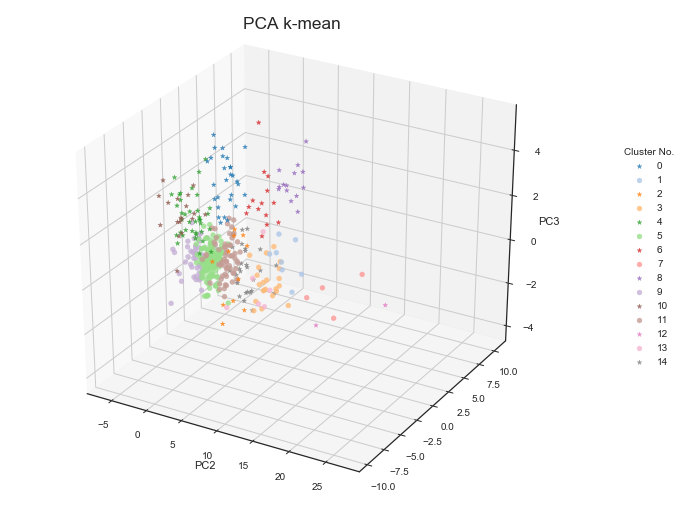

In [10]:
#### Plotting PCA3D
#%matplotlib notebook
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
fig= plt.figure(figsize =(10,9))
ax = fig.add_subplot(111, projection='3d')
for i in range(n_labels):
    df = C_kmean[C_kmean['Label']== i]
    ax.scatter(df['PC1'], df['PC2'], df['PC3'], s=25, c= cm.colors[i], marker= mk[i%2], alpha=0.8, label = str(i))
    ax.set_xlabel('PC1')
ax.set_xlabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA k-mean\n', fontsize='xx-large')
plt.legend(title='Cluster No.',bbox_to_anchor=(1.2,.5), loc=7, fontsize='medium')
plt.show()

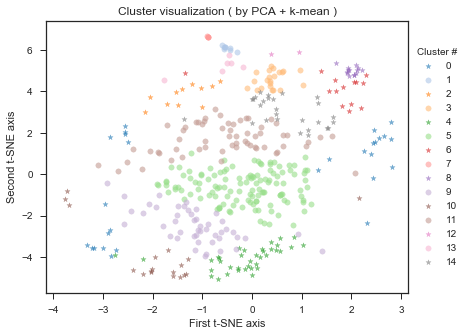

In [11]:
myVisualizer(kmeans.labels_, 'PCA + k-mean')

In [15]:
#show labels
#print(len(Genes),Genes[40],Genes[388])
#Genes
#myNameVisual(kmeans.labels_, 'PCA + k-mean');

424 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

## t-SNE + k-mean
￼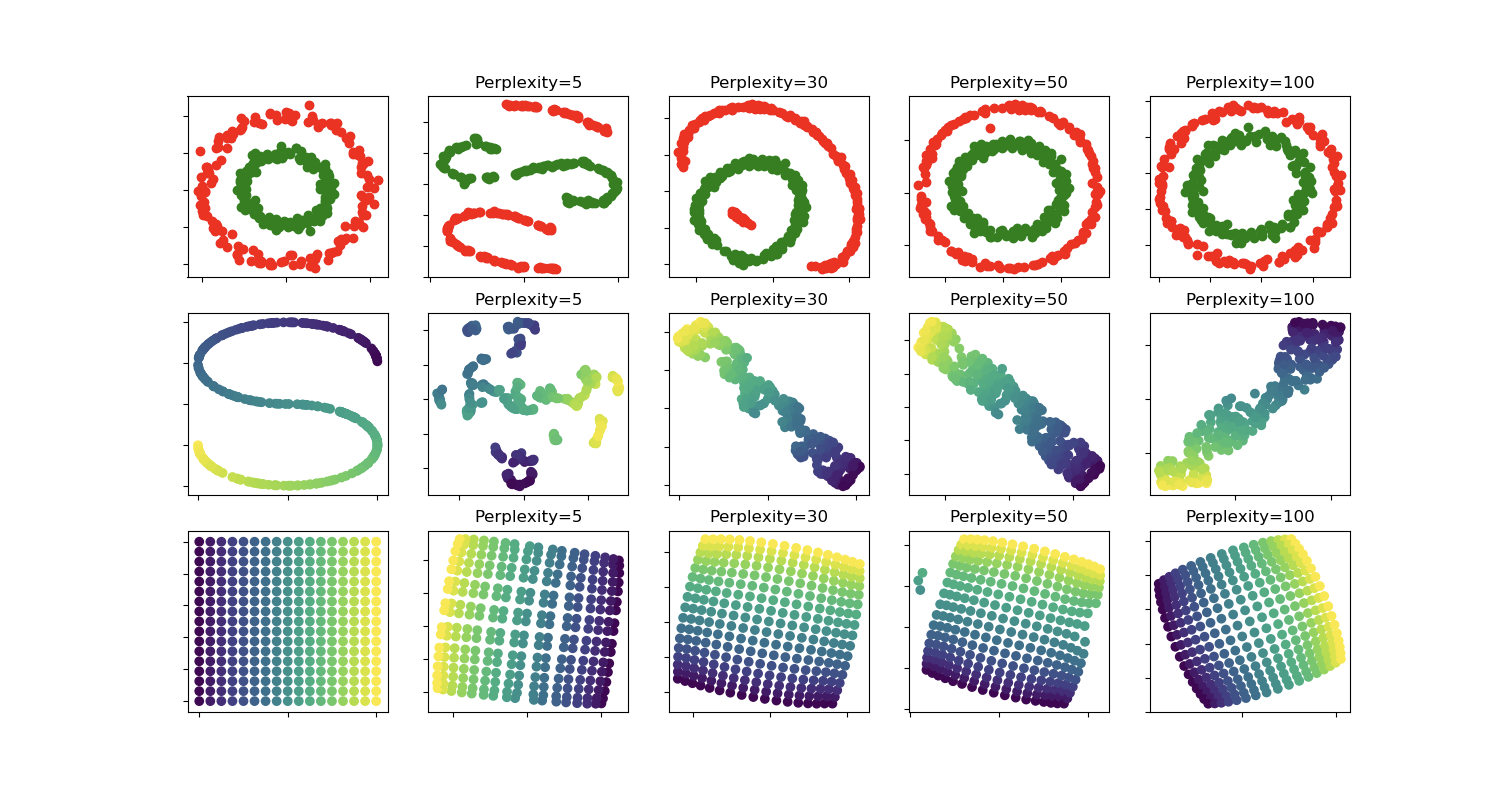

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs
C_tsne.head:
                       TC1        TC2        TC3  Label
eIF2B-delta _1   9.759106  -0.034535   2.658416      9
CG3817 _1      -31.700663 -21.584574  59.892467     14
CycC            19.997108 -69.767563  30.890766      2


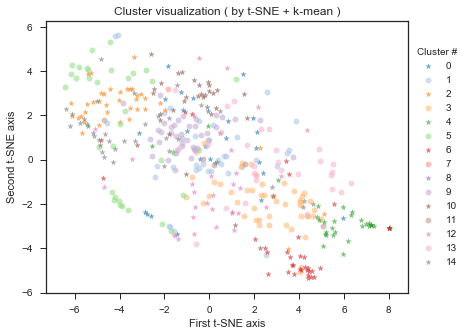

Conclusion: default t-SNE does not function well as a clusterer


In [16]:
#t-SNE to 3 dimentions
#'n_components should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.'
#http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
%time
from sklearn.manifold import TSNE

tsne3 = TSNE(n_components=3,perplexity=60.0,n_iter=500, early_exaggeration=12.0, 
                      learning_rate=200.0,random_state = 0)
c_tsne3 = tsne3.fit_transform(C_normalized)

'''sklearn.manifold.TSNE(n_components=2, perplexity=30.0, early_exaggeration=12.0, 
                      learning_rate=200.0, n_iter=1000, n_iter_without_progress=300, 
                      min_grad_norm=1e-07, metric=’euclidean’, init=’random’, 
                      verbose=0, random_state=None, method=’barnes_hut’, angle=0.5)'''

#k-mean on t-SNE 3D

from sklearn.cluster import KMeans
n_labels= 15
kmeans3 = KMeans(n_clusters=n_labels, random_state=0).fit(c_tsne3)

C_tsne3= pd.DataFrame(c_tsne3, index=C.index, columns= ('TC1','TC2','TC3'))
C_tsne3['Label'] = kmeans3.labels_

print('C_tsne.head:\n', C_tsne3.head(3))
myVisualizer(kmeans3.labels_, 't-SNE + k-mean')
print('Conclusion: default t-SNE does not function well as a clusterer')

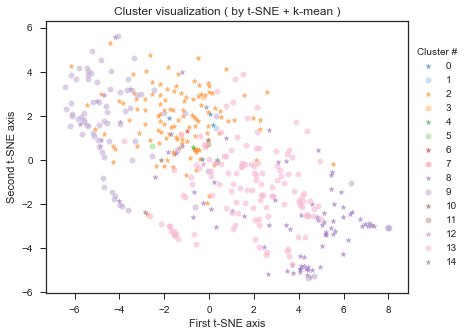

t-SNE + k-mean time: 8.43235s 
Conclusion: (t-SNE + k-mean) does not function well as a clusterer


In [17]:
#t-SNE to 10 dimentions
#'n_components should be inferior to 4 for the barnes_hut algorithm as it relies on quad-tree or oct-tree.'
#http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE
st = time.time()
tsne10= TSNE(n_components=10,method='exact',perplexity=250.0,n_iter=800, early_exaggeration=12.0, 
                      learning_rate=200.0,random_state = 0)
c_tsne10= tsne10.fit_transform(C_normalized)

#k-mean on t-SNE 10D
#http://scikit-learn.org/stable/modules/generated /sklearn.cluster.KMeans.html

from sklearn.cluster import KMeans
n_labels= 15
kmeans10 = KMeans(n_clusters=n_labels, random_state=0).fit(c_tsne10)
TCcolumns = []
for i in range (1,11):
    TCcolumns.append('TC{}'.format(i))

'''C_tsne10= pd.DataFrame(c_tsne10, index=C.index, columns= TCcolumns)
C_tsne10['Label'] = kmeans10.labels_

print('C_tsne10.head:\n', C_tsne10.head(3))
'''
elapsed_time = time.time() - st
myVisualizer(kmeans10.labels_, 't-SNE + k-mean')
print('t-SNE + k-mean time: {0:.5f}s'.format(elapsed_time), '\nConclusion: (t-SNE + k-mean) does not function well as a clusterer')

## Comparing different clustering algorithms on toy datasets

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html
￼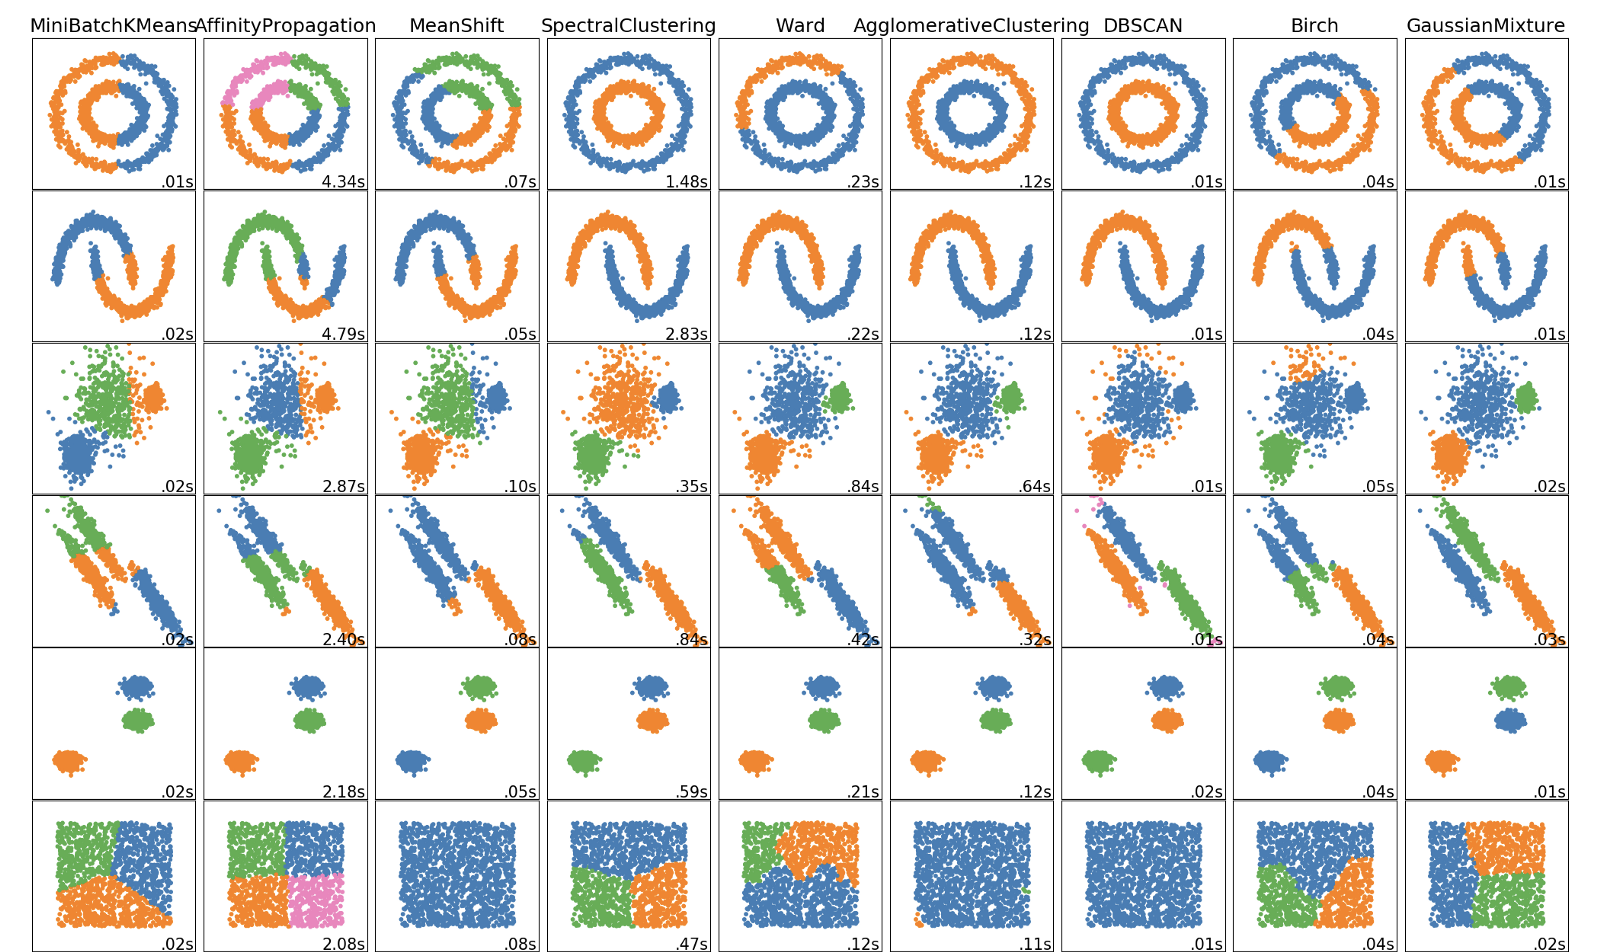

## MeanShift

In [7]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

n_labels= 15
st = time.time()
bandwidth = estimate_bandwidth(C_pca, quantile=0.15, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, cluster_all=False,bin_seeding=True).fit(C_pca)
elapsed_time = time.time() - st

#cluster_centers = ms.cluster_centers_
n_clusters_ = len(np.unique(ms.labels_))

'''class sklearn.cluster.MeanShift(bandwidth=None, 
seeds=None, bin_seeding=False, min_bin_freq=1, cluster_all=True, n_jobs=1)'''

print('MeanShift time: {0:.5f}s, n_clusters ='.format(elapsed_time),n_clusters_,
      '\nConclusion: MeanShift does not function well on our data')
#myVisualizer(ms.labels_, 'PCA + MeanShift')
#ms.get_params(deep=True)

MeanShift time: 0.11661s, n_clusters = 14 
Conclusion: MeanShift does not function well on our data


## AgglomerativeClustering - ward

In [9]:
#http://scikit-learn.org/0.15/modules/generated/sklearn.cluster.Ward.html
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
n_labels= 15

'''linkage : {“ward”, “complete”, “average”}'''

# without connectivity constraints
st = time.time()
ward = AgglomerativeClustering(n_clusters=n_labels, connectivity= None, linkage='ward').fit(C_pca)
award = AgglomerativeClustering(n_clusters=n_labels, connectivity= None, linkage='ward').fit(C_normalized)
elapsed_time = time.time() - st
print('Ward time: {0:.5f}s\n '.format(elapsed_time))

#myVisualizer(ward.labels_, 'PCA + Ward')

# without connectivity constraints
st = time.time()
connectivity = kneighbors_graph(C_pca, n_neighbors=20, include_self=False)
wardcn = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity, linkage='ward').fit(C_pca)
awardcn = AgglomerativeClustering(n_clusters=n_labels, connectivity= connectivity, linkage='ward').fit(C_normalized)
elapsed_time = time.time() - st
print('Ward with connectivity time: {0:.5f}s\n '.format(elapsed_time))

#myVisualizer(wardcn.labels_, 'PCA + Wardcn')

Ward time: 0.01069s
 
Ward with connectivity time: 0.16331s
 


## SpectralClustering

In [10]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html
from sklearn.cluster import SpectralClustering
n_labels= 20

'''SpectralClustering(n_clusters=8, eigen_solver=None, random_state=None, n_init=10, gamma=1.0, 
affinity=’rbf’, n_neighbors=10, eigen_tol=0.0, assign_labels=’kmeans’, degree=3, coef0=1, 
kernel_params=None, n_jobs=-1)

affinity='laplacian',‘nearest_neighbors’, ‘rbf’
'''

#spcl_nneighbors
st = time.time()
spcl_nneighbors = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(C_pca)
aspcl_nneighbors = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='nearest_neighbors',n_neighbors=100,assign_labels='discretize').fit(C_normalized)
elapsed_time = time.time() - st
print('spcl_nneighbors time: {0:.5f}s\n '.format(elapsed_time))
#myVisualizer(spcl_nneighbors.labels_, 'PCA + spcl_nneighbors')

#spcl_laplacian
st = time.time()
spcl_laplacian = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(C_pca)
aspcl_laplacian = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='laplacian',eigen_tol=0.0, assign_labels='discretize').fit(C_normalized)
elapsed_time = time.time() - st
print('spcl_laplacian time: {0:.5f}s\n '.format(elapsed_time))
#myVisualizer(spcl_laplacian.labels_, 'PCA + spcl_laplacian')

#spcl_rbf
st = time.time()
spcl_rbf = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='rbf', assign_labels='discretize').fit(C_pca)
aspcl_rbf = SpectralClustering(n_clusters=n_labels,eigen_solver='arpack', random_state=1, n_init=20, gamma=1.0, 
affinity='rbf', assign_labels='discretize').fit(C_normalized)
elapsed_time = time.time() - st
print('spcl_rbf time: {0:.5f}s\n '.format(elapsed_time))
#myVisualizer(spcl_rbf.labels_, 'PCA + spcl_rbf')

spcl_nneighbors time: 0.18404s
 
spcl_laplacian time: 0.09094s
 
spcl_rbf time: 0.06014s
 


## DBSCAN

In [11]:
#http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html
from sklearn.cluster import DBSCAN

st = time.time()
dbscan = DBSCAN(eps=2, min_samples=4,algorithm='auto',leaf_size=10,p=2).fit(C_pca)

'''DBSCAN(eps=0.5, min_samples=5, metric=’euclidean’, metric_params=None, 
algorithm=’auto’, leaf_size=30, p=None, n_jobs=1)[source]

algorithm : {‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’},'''

elapsed_time = time.time() - st

print(dbscan.get_params())
print('DBSCAN time: {0:.5f}s,'.format(elapsed_time), '\nConclusion: DBSCAN does not function well on our data')
#myVisualizer(dbscan.labels_ , 'PCA + DBSCAN')

{'algorithm': 'auto', 'eps': 2, 'leaf_size': 10, 'metric': 'euclidean', 'metric_params': None, 'min_samples': 4, 'n_jobs': 1, 'p': 2}
DBSCAN time: 0.01277s, 
Conclusion: DBSCAN does not function well on our data


## Brich

In [12]:
#hhttp://scikit-learn.org/stable/modules/generated/sklearn.cluster.Birch.html
from sklearn.cluster import Birch
st = time.time()

n_labels= 20
brich = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(C_pca)
abrich = Birch(threshold=0.1, branching_factor=20, n_clusters=n_labels, compute_labels=True, copy=True).fit(C_normalized)
#len(brich.labels_)
elapsed_time = time.time() - st
print('Birch time: {0:.5f}s\n'.format(elapsed_time))
#myVisualizer(brich.labels_, 'PCA + Brich')

Birch time: 0.08559s



## Collective Plotting

In [14]:
# collect arguments
Labels = [kmeans.labels_,ward.labels_,wardcn.labels_,spcl_nneighbors.labels_,
          spcl_laplacian.labels_,spcl_rbf.labels_,brich.labels_]
alabels = [akmeans.labels_,award.labels_,awardcn.labels_,aspcl_nneighbors.labels_,
          aspcl_laplacian.labels_,aspcl_rbf.labels_,abrich.labels_]
labelnames = ['k-mean','ward','ward_connection','spcl_nneighbors','spcl_laplacian','spcl_rbf','birch']

In [17]:
n_labels= 20
for n in [0,1,2,3,4,5,6]:
    myNameVisual(Labels[n],'PCA+'+labelnames[n])
elapsed_time = time.time() - st
print('Birch time: {0:.5f}s\n'.format(elapsed_time))

424
424
424
424
424
424
424
Birch time: 45.10827s



In [19]:
# create a 2x2 grid of subplots
st = time.time()

fig,((Ax0,ax0),(Ax1,ax1),(Ax2,ax2),(Ax3,ax3),(Ax4,ax4),(Ax5,ax5),(Ax6,ax6)) = plt.subplots(7,2,figsize=(14,45),
                                                                                           sharex=True, sharey=True)
Axs = [Ax0,Ax1,Ax2,Ax3,Ax4,Ax5,Ax6]
axs = [ax0,ax1,ax2,ax3,ax4,ax5,ax6]

def subVisualizer(whichsub,label,labelname='unknown label'):
    C_tsne_plot['Label'] = label
    clusters= np.unique(label)
    mk=['*','o']
    for i in clusters:
        df = C_tsne_plot[C_tsne_plot['Label']== i]
        whichsub.scatter(df['TC1'], df['TC2'], s=30, c= cm.colors[i], marker= mk[i%2], alpha=0.4, label = str(i))
        whichsub.set_title('Clustered by {}'.format(labelname))
        whichsub.legend(title='Cluster #',loc=8, bbox_to_anchor= (1.08,0), ncol=1, fontsize='medium')
    return

for n in range(7):
    subVisualizer(Axs[n],Labels[n],'PCA+'+labelnames[n])
    subVisualizer(axs[n],alabels[n],labelnames[n])

#plt.title('Summary')
#plt.savefig("Summary.pdf")
plt.close()

elapsed_time = time.time() - st
print('Plotting time: {0:.5f}s\n'.format(elapsed_time))    

#necessary on some systems to update the plot
#plt.gcf().canvas.draw()

Plotting time: 3.45460s



## Ensemble

In [ ]:
#try zip()
#ls1 = ['a','b','c','d']
#ls2 = [1,2,3,4]
#zip1 = zip(ls1,ls2)
#for x,y in zip1:
#    print(x)
#    print(y)'''

In [14]:
# collect arguments
Labels = [kmeans.labels_,ward.labels_,wardcn.labels_,spcl_nneighbors.labels_,
          spcl_laplacian.labels_,spcl_rbf.labels_,brich.labels_]
alabels = [akmeans.labels_,award.labels_,awardcn.labels_,aspcl_nneighbors.labels_,
          aspcl_laplacian.labels_,aspcl_rbf.labels_,abrich.labels_]
labelnames = ['k-mean','ward','ward_connection','spcl_nneighbors','spcl_laplacian','spcl_rbf','birch']

In [15]:
#C10_labels
for i,j in zip(Labels,labelnames):
    print(i[:5], j)

c10_labels=np.vstack(Labels).T # get transpose
C10_labels= pd.DataFrame(c10_labels, columns= labelnames, index=C.index)
#C10_labels.to_csv('C10.csv')

C10_labels.head()

[ 5 11  4  0  4] k-mean
[12  1  4 12  4] ward
[13  1  4  1  4] ward_connection
[ 0 11  4  0 10] spcl_nneighbors
[ 0 10 13  2 13] spcl_laplacian
[ 0  7 10 16 10] spcl_rbf
[12  1  5 12  5] birch


,k-mean,ward,ward_connection,spcl_nneighbors,spcl_laplacian,spcl_rbf,birch
eIF2B-delta _1,5,12,13,0,0,0,12
CG3817 _1,11,1,1,11,10,7,1
CycC,4,4,4,4,13,10,5
CG4673 _1,0,12,1,0,2,16,12
CG13482 _1,4,4,4,10,13,10,5


In [16]:
#C29_labels
for i,j in zip(alabels,labelnames):
    print(i[:5], j)

c29_labels=np.vstack(alabels).T # get transpose
C29_labels= pd.DataFrame(c29_labels, columns= labelnames, index=C.index)
#C29_labels.to_csv('C29.csv')

C29_labels.head()

[ 0  9  8 12  8] k-mean
[12  1  6  0  6] ward
[12  1  6 12  6] ward_connection
[0 9 5 0 5] spcl_nneighbors
[ 0  7 12 15 12] spcl_laplacian
[ 0 15  3  5  9] spcl_rbf
[ 5 19  0  6  0] birch


,k-mean,ward,ward_connection,spcl_nneighbors,spcl_laplacian,spcl_rbf,birch
eIF2B-delta _1,0,12,12,0,0,0,5
CG3817 _1,9,1,1,9,7,15,19
CycC,8,6,6,5,12,3,0
CG4673 _1,12,0,12,0,15,5,6
CG13482 _1,8,6,6,5,12,9,0


In [ ]:
# seaborn.clustermap
'''seaborn.clustermap(data, pivot_kws=None, method='average', metric='euclidean', z_score=None, 
                   standard_scale=None, figsize=None, cbar_kws=None, row_cluster=True, col_cluster=True, 
                   row_linkage=None, col_linkage=None, row_colors=None, col_colors=None, mask=None, **kwargs)'''

sns.clustermap(C10_labels,cmap="mako")

In [17]:
# dendrogram
C10labels=pd.DataFrame(index = C.index)
for i in C10_labels.columns:  # set categorical    
    C10labels[i]= pd.Categorical(C10_labels[i])
C29labels=pd.DataFrame(index = C.index)
for i in C29_labels.columns:  # set categorical
    C29labels[i]= pd.Categorical(C29_labels[i])

from scipy.cluster.hierarchy import dendrogram, linkage

# Calculate the distance between each sample
Z10= linkage(C10labels, 'complete',metric='Hamming') # Hamming distance
Z29= linkage(C29labels, 'complete',metric='Hamming')

# Make the dendro
plt.figure(figsize=(10,90))
ax1 = plt.subplot(1, 2, 1)
dendrogram(
    Z10,
    orientation="left",
    labels=C.index,
    leaf_rotation=0,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    color_threshold=0.5, 
    above_threshold_color='grey'
)
ax1.set_title('Ensemble clustering on data after PCA')
plt.xlabel('distance')
plt.xlim((1.1,-0.05))
ax2 = plt.subplot(1, 2, 2)
dendrogram(
    Z29,
    orientation="right",
    labels=C.index,
    leaf_font_size=12,
    color_threshold=0.5, 
    above_threshold_color='grey'
)
ax2.set_title('Ensemble clustering on data without PCA')
plt.xlabel('distance')
plt.xlim((-0.05,1.1))
plt.subplots_adjust(wspace=1.6) #space between subplots
plt.savefig("Ensemble.pdf")
plt.close()

In [ ]:
#C.index[379]

In [ ]:

from scipy.cluster.hierarchy import dendrogram, linkage
 
# Data set
url = 'https://python-graph-gallery.com/wp-content/uploads/mtcars.csv'
df = pd.read_csv(url)
df = df.set_index('model')
del df.index.name
 
# Calculate the distance between each sample
Z = linkage(df, 'ward')
 
# Make the dendro
dendrogram(Z, labels=df.index, leaf_rotation=0, orientation="left", color_threshold=140, above_threshold_color='grey')
 
# Create a color palette with 3 color for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("tab20", 20)
 
# transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
df['cyl']=pd.Categorical(df['cyl'])
my_color=df['cyl'].cat.codes
 
# Apply the right color to each label
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()
num= -1

for lbl in xlbls:
    num +=1
    val=my_color[num]
    lbl.set_color(my_palette(val))
